In [4]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt


train_images = np.loadtxt('lab3/data/train_images.txt')

train_labels = np.loadtxt('lab3/data/train_labels.txt', 'float').astype('int')

test_images = np.loadtxt('lab3/data/test_images.txt')

test_labels = np.loadtxt('lab3/data/test_labels.txt', 'float').astype('int')



class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images=train_images
        self.train_labels=train_labels
        
    def classify_image(self,test_image,num_neighbors=3,metric='l2'):
        if(metric=='l2'):
            distances=np.sqrt(np.sum(((self.train_images-test_image)**2),axis=1))
        
        if(metric=='l1'):
            distances=np.sum(np.abs(self.train_images-test_image),axis=1)
        
        sort_indices=np.argsort(distances)
        best_neighbours=self.train_labels[sort_indices[:num_neighbors]]
        histogram=np.bincount(best_neighbours)
        return np.argmax(histogram)
    
    def accuracy(self,num_neighbors=3,metric='l2'):
        nr=0
        for i in range(len(test_images)):
            if (test_labels[i]==self.classify_image(test_images[i],num_neighbors,metric)):
                nr+=1
        return (nr/len(test_images))
            
        
classifier=KnnClassifier(train_images,train_labels)
print(classifier.accuracy())
    

0.898


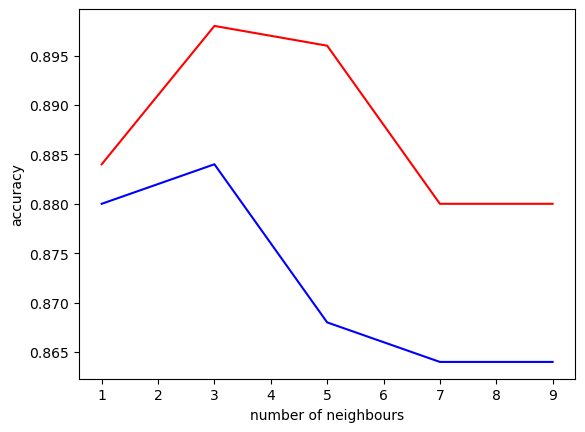

In [10]:
xpoints = np.array([1,3,5,7,9])
ypoints_L2=np.array([])
ypoints_L1=np.array([])
for x in xpoints:
    ypoints_L2=np.append(ypoints_L2,[classifier.accuracy(x)])
    ypoints_L1=np.append(ypoints_L1,[classifier.accuracy(x,'l1')])
plt.plot(xpoints,ypoints_L2,color='r',label='L2')
plt.plot(xpoints,ypoints_L1,color='b',label='L1')

plt.xlabel('number of neighbours')
plt.ylabel('accuracy')

  
plt.show()
    